### Milestone #4
Group 1
Lei Wu & Edward Brown

In [ ]:
# Import libraries
!pip install mysql-connector-python
import mysql.connector
import matplotlib.pyplot as plt
from mysql.connector import Error

config = {
    "host": "127.0.0.1",
    "user": "root",
    "password": "mypassword",
    "database": "shrinkflation"
}

connection = None

try:
    connection = mysql.connector.connect(**config)
    #print("Successfully connected to the database")
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Your connected to database: ", record)
# Test query:
        sql_select_Query = "select CustomerID from customer where UserType = 'PaidUser'"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query)
        records = cursor.fetchall()
        print("Customers with paid status:\n")
        for row in records:
            print('CustomerID =',row[0],"\n")
#END OF QUERIES ^^^
except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.3.0
Your connected to database:  ('shrinkflation',)
Customers with paid status:

CustomerID = 033f7f6121501ae9 

CustomerID = 5ce4d191fd14ac85 

CustomerID = 7fde19c6179474de 

CustomerID = 81162e1ef3d93f96 

CustomerID = 9e8486cdd435beda 

CustomerID = a2b14389d02e3cd6 

CustomerID = Cust102 

CustomerID = Cust104 

CustomerID = Cust106 

CustomerID = Cust108 

CustomerID = Cust110 

CustomerID = dbaa8bd25e06cc64 

CustomerID = ffbc4675f864e0e9 



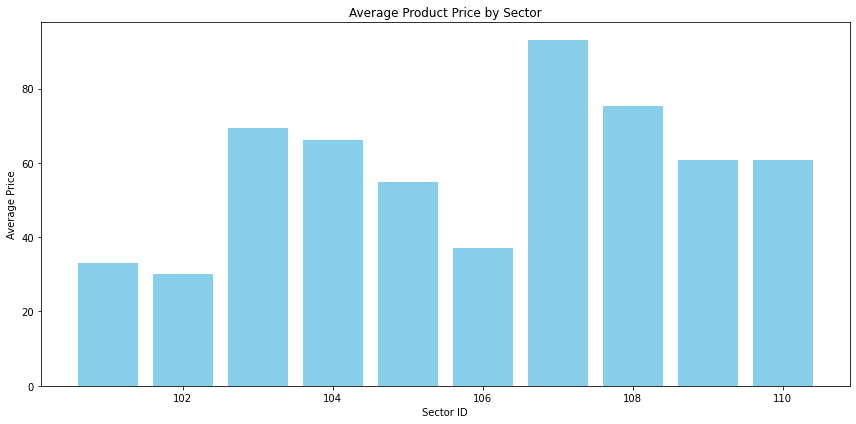

In [ ]:
#Bar Graph Query: Average Price Change by Sector

def query_avg_product_price_by_sector():
    cursor = connection.cursor()
    query = """
    SELECT sec.SectorID, AVG(p.Price) AS avg_price
    FROM sector sec
    JOIN competes_in ci ON sec.SectorID = ci.SectorID
    JOIN parent_company pc ON ci.ParentCoID = pc.ParentCoID
    JOIN produces pr ON pc.ParentCoID = pr.ParentCoID
    JOIN product p ON pr.ASIN = p.ASIN
    GROUP BY sec.SectorID
    ORDER BY avg_price DESC;
    """
    cursor.execute(query)
    results = cursor.fetchall()
    cursor.close()
    return results

# Visualization for Average Product Price by Sector
data = query_avg_product_price_by_sector()
sectors, avg_prices = zip(*data)

plt.figure(figsize=(12, 6))
plt.bar(sectors, avg_prices, color='skyblue')
plt.xlabel('Sector ID')
plt.ylabel('Average Price')
plt.title('Average Product Price by Sector')
plt.tight_layout()
plt.show()


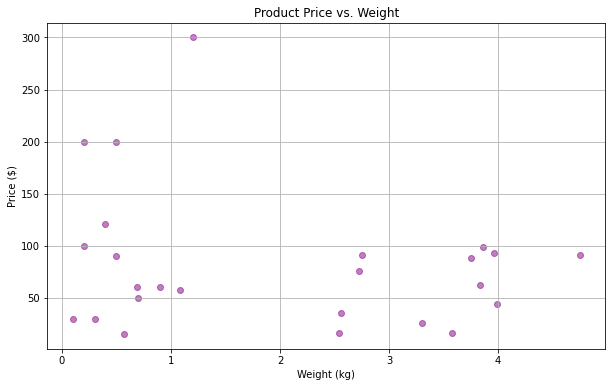

In [ ]:
#Scatter Graph Query: Product Prive vs. Weight

def query_price_vs_weight():
    cursor = connection.cursor()
    query = """
    SELECT Price, Weight
    FROM product;
    """
    cursor.execute(query)
    results = cursor.fetchall()
    cursor.close()
    return results

# Visualization
import matplotlib.pyplot as plt

data = query_price_vs_weight()
prices, weights = zip(*data)

plt.figure(figsize=(10, 6))
plt.scatter(weights, prices, alpha=0.5, color='purple')
plt.title('Product Price vs. Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


In [ ]:
#Bar Graph Query: Average Price Change by Sector

def query_avg_price_change_by_sector():
    cursor = connection.cursor()
    query = """
        SELECT
            sec.SectorID,
            AVG(prod.Price) AS AveragePrice
        FROM
            sector sec
        JOIN
            competes_in ci ON sec.SectorID = ci.SectorID
        JOIN
            parent_company pc ON ci.ParentCoID = pc.ParentCoID
        JOIN
            produces pr ON pc.ParentCoID = pr.ParentCoID
        JOIN
            product prod ON pr.ASIN = prod.ASIN
        GROUP BY
            sec.SectorID;
    """
    cursor.execute(query)
    results = cursor.fetchall()
    cursor.close()
    return results

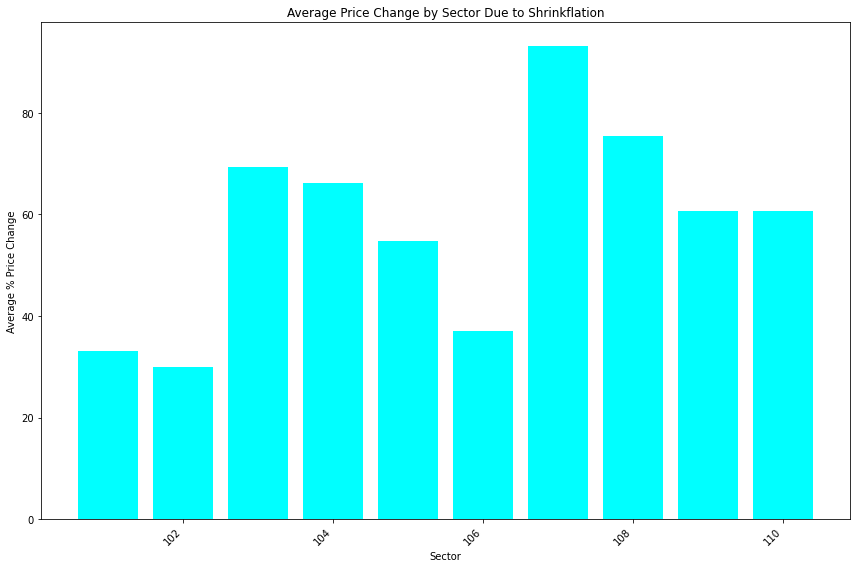

In [ ]:
#Bar Graph Visualization: Average Price Change by Sector

# Assuming the function query_avg_price_change_by_sector() returns the sector names and their average percent change.
sectors, avg_changes = zip(*query_avg_price_change_by_sector())

plt.figure(figsize=(12, 8))
plt.bar(sectors, avg_changes, color='cyan')
plt.xlabel('Sector')
plt.ylabel('Average % Price Change')
plt.title('Average Price Change by Sector Due to Shrinkflation')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
#Histogram Query: Price Distribution

def query_product_prices():
    cursor = connection.cursor()
    query = """
    SELECT Price FROM product;
    """
    cursor.execute(query)
    results = cursor.fetchall()
    cursor.close()
    return [price[0] for price in results]  # Convert list of tuples to list of prices



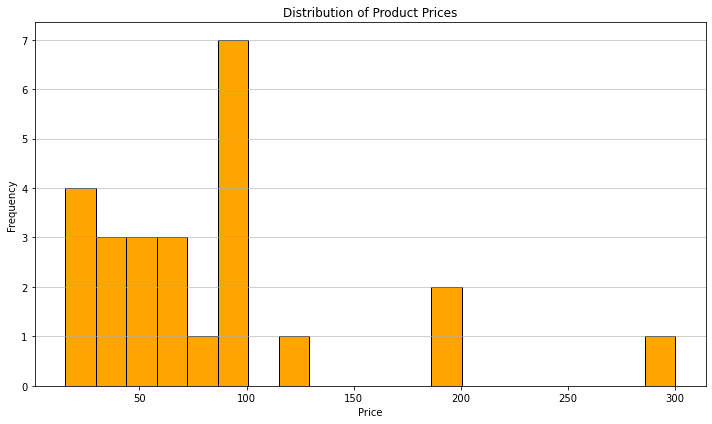

In [ ]:
#Histogram visualization: Price Distribution

prices = query_product_prices()

plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


In [ ]:
# Query Shrinkflation Events Over Time

def query_shrinkflation_events_over_time():
    cursor = connection.cursor()
    query = """
    SELECT DATE_FORMAT(detecteddate, '%Y-%m') AS month, COUNT(eventid) AS event_count
    FROM shrinkflation_event
    GROUP BY month
    ORDER BY month;
    """
    cursor.execute(query)
    results = cursor.fetchall()
    cursor.close()
    return results


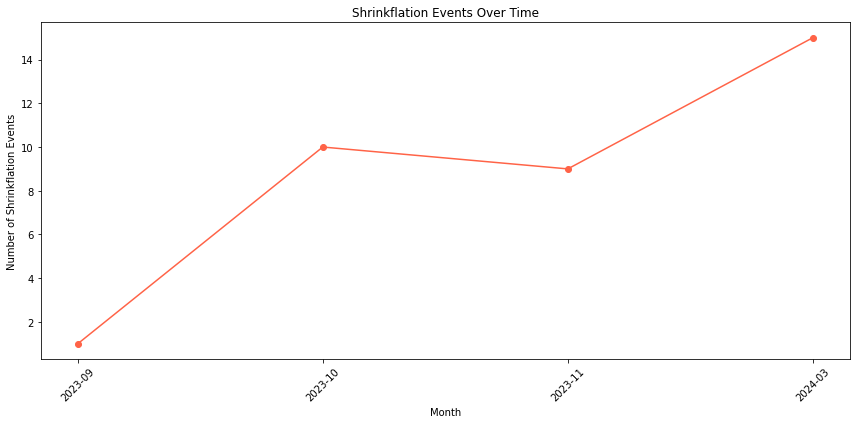

In [ ]:
# Visualization Shrinkflation Events Over Time

data = query_shrinkflation_events_over_time()
months, event_counts = zip(*data)

plt.figure(figsize=(12, 6))
plt.plot(months, event_counts, marker='o', linestyle='-', color='tomato')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Shrinkflation Events')
plt.title('Shrinkflation Events Over Time')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


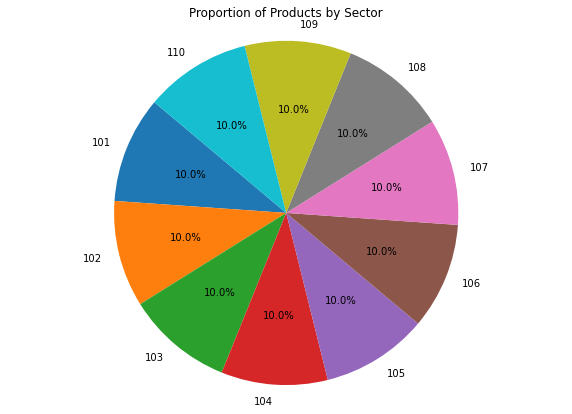

In [ ]:
#Pie Graph Query: Proportion of Products by Sector

def query_products_by_sector():
    cursor = connection.cursor()
    query = """
    SELECT sector.SectorID, COUNT(product.ASIN) AS ProductCount
    FROM sector
    JOIN competes_in ON sector.SectorID = competes_in.SectorID
    JOIN parent_company ON competes_in.ParentCoID = parent_company.ParentCoID
    JOIN produces ON parent_company.ParentCoID = produces.ParentCoID
    JOIN product ON produces.ASIN = product.ASIN  -- Correctly link to the product table
    GROUP BY sector.SectorID
    ORDER BY ProductCount DESC;  -- Optional, to order by the count of products;
    """
    cursor.execute(query)
    results = cursor.fetchall()
    cursor.close()
    return results

data = query_products_by_sector()  # Ensure you have a valid connection `conn`
sector_names, product_counts = zip(*data)

plt.figure(figsize=(10, 7))
plt.pie(product_counts, labels=sector_names, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Products by Sector')
plt.axis('equal')
plt.show()


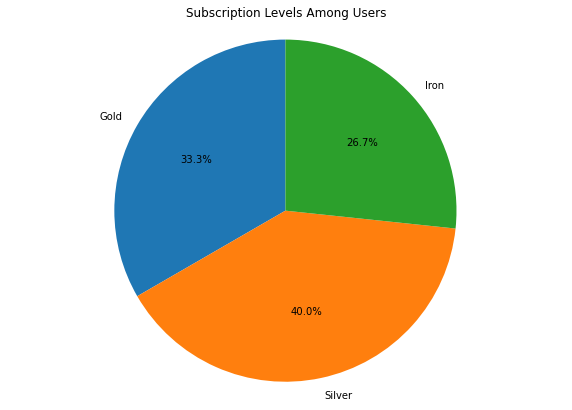

In [ ]:
# Pie Chart: Subscption Levels Among Users

def query_subscription_levels():
    cursor = connection.cursor()
    query = """
    SELECT SubscriptionLevel, COUNT(*) AS UserCount
    FROM subscription
    GROUP BY SubscriptionLevel;
    """
    cursor.execute(query)
    results = cursor.fetchall()
    cursor.close()
    return results

data = query_subscription_levels()
levels, counts = zip(*data)

plt.figure(figsize=(10, 7))
plt.pie(counts, labels=levels, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Levels Among Users')
plt.axis('equal')
plt.show()